# Librerias

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Cargamos datos

In [2]:
df_limpio = pd.read_csv("../01_data/train_nonull_nooutliers_encoding_estandarizado.csv", index_col = 0)
df_limpio.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded,price_LOG,price_SQRT,price_NORM2
id,,,,,,,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,3.0,5.0,0.0,1.848927,2.520516,0.139581
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,4.0,6.0,5.0,2.217354,3.030347,0.837485
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983,4.0,3.0,3.0,2.077314,2.825420,0.541554
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371,2.0,4.0,0.0,2.124773,2.893268,0.637238
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588,3.0,4.0,4.0,1.885250,2.566710,0.197534


# Decision Tree

In [3]:
# Reparto de datos en train y test
# ==============================================================================
# lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
X = df_limpio.drop('price', axis =1)
y = df_limpio['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [4]:
# Eliminar las columnas categóricas originales de los datos de entrenamiento
X_train = X_train.drop(columns=['cut', 'color', 'clarity'])

# Verificar que las columnas se hayan eliminado correctamente
X_train.head()

,carat,depth,table,x,y,z,cut_encoded,color_encoded,clarity_encoded,price_LOG,price_SQRT,price_NORM2
id,,,,,,,,,,,,
24247,0.80,63.9,56.0,5.84,5.87,3.74,2.0,3.0,2.0,2.080816,2.830371,0.548459
29562,1.23,61.4,56.0,6.89,6.91,4.24,4.0,2.0,6.0,2.207835,3.015958,0.816030
13128,0.27,62.1,57.0,4.13,4.15,2.57,4.0,6.0,5.0,1.861441,2.536336,0.159309
4330,0.32,60.2,58.0,4.47,4.43,2.68,3.0,2.0,4.0,1.883883,2.564956,0.195314
39131,0.72,60.3,58.0,5.81,5.76,3.49,3.0,5.0,0.0,2.056429,2.796069,0.500863


In [5]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: total: 0 ns
Wall time: 0 ns


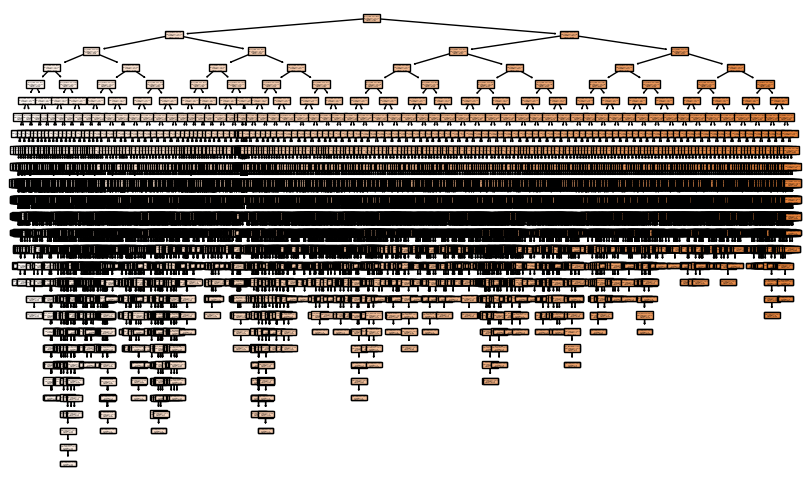

In [6]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [7]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

3.4641016151377544

In [8]:
# max depth

print(regressor.tree_.max_depth)

27


In [9]:
X_test = X_test.drop(columns=['cut', 'color', 'clarity'])
X_test

,carat,depth,table,x,y,z,cut_encoded,color_encoded,clarity_encoded,price_LOG,price_SQRT,price_NORM2
id,,,,,,,,,,,,
37036,0.31,62.3,56.0,4.40,4.37,2.73,3.0,6.0,2.0,1.879160,2.558906,0.187670
34111,0.51,62.0,55.0,5.11,5.15,3.18,4.0,5.0,2.0,1.994428,2.710719,0.384957
7687,0.32,62.5,60.0,4.35,4.29,2.70,3.0,4.0,4.0,1.904939,2.592103,0.229840
28889,1.00,61.6,61.0,6.35,6.38,3.92,2.0,4.0,5.0,2.190424,2.989816,0.777312
32640,0.33,62.6,58.0,4.44,4.41,2.77,3.0,4.0,3.0,1.888735,2.571186,0.203206
...,...,...,...,...,...,...,...,...,...,...,...,...
873,0.41,60.7,58.0,4.83,4.79,2.92,3.0,4.0,4.0,1.926873,2.620687,0.266584
8419,0.56,61.6,56.0,5.29,5.31,3.27,2.0,4.0,5.0,2.028937,2.757898,0.448582
37538,1.71,62.8,58.0,7.48,7.55,4.72,1.0,0.0,3.0,2.206735,3.014299,0.813564


In [10]:
X_train

,carat,depth,table,x,y,z,cut_encoded,color_encoded,clarity_encoded,price_LOG,price_SQRT,price_NORM2
id,,,,,,,,,,,,
24247,0.80,63.900000,56.0000,5.84,5.87,3.74,2.0,3.0,2.0,2.080816,2.830371,0.548459
29562,1.23,61.400000,56.0000,6.89,6.91,4.24,4.0,2.0,6.0,2.207835,3.015958,0.816030
13128,0.27,62.100000,57.0000,4.13,4.15,2.57,4.0,6.0,5.0,1.861441,2.536336,0.159309
4330,0.32,60.200000,58.0000,4.47,4.43,2.68,3.0,2.0,4.0,1.883883,2.564956,0.195314
39131,0.72,60.300000,58.0000,5.81,5.76,3.49,3.0,5.0,0.0,2.056429,2.796069,0.500863
...,...,...,...,...,...,...,...,...,...,...,...,...
6270,1.51,62.200000,57.0000,7.29,7.33,4.55,4.0,2.0,3.0,2.234734,3.056796,0.877189
11298,0.77,61.000000,58.0000,5.94,5.90,3.61,3.0,3.0,2.0,2.074052,2.820815,0.535142
38247,0.50,61.745031,57.4528,5.35,5.31,2.95,0.0,6.0,4.0,2.020753,2.746634,0.433292


In [11]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [12]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [13]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,1.623095e-05,3.283360e-08,1.812004e-04,1.0,test,Decission Tree I
1,7.359531e-16,2.124742e-30,1.457649e-15,1.0,train,Decission Tree I


## Submision 

### Trasnformacion de los datos del archivo de kaggle test


In [14]:
df_submision = pd.read_csv("../01_data/test_nonull_nooutliers_encoding.csv", index_col = 0)
df_submision = df_submision.drop(columns=['cut', 'color', 'clarity'])
df_submision

,carat,depth,table,x,y,z,cut_encoded,color_encoded,clarity_encoded
id,,,,,,,,,
0,0.32,60.500000,58.0,4.43,4.49,2.70,4.0,1.0,2.0
1,1.24,62.900000,60.0,6.80,6.74,4.26,3.0,1.0,2.0
2,1.66,62.000000,59.0,7.55,7.60,4.70,3.0,5.0,2.0
3,0.75,60.600000,56.0,5.94,5.90,3.59,3.0,5.0,0.0
4,1.50,61.758487,55.0,7.26,7.15,4.67,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...
13480,1.10,59.600000,60.0,6.74,6.70,4.00,3.0,4.0,2.0
13481,0.90,62.100000,60.0,6.14,6.20,3.83,2.0,5.0,2.0
13482,0.30,62.100000,53.3,4.30,4.32,2.68,4.0,3.0,3.0


In [15]:
y_submision = regressor.predict(df_submision)
y_submision

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- price_LOG
- price_NORM2
- price_SQRT


In [ ]:
df_submision = pd.DataFrame(y_submision)
df_submision.reset_index(inplace=True)
df_submision.rename(columns = {"index":"id",0:"price"}, inplace = True)
df_submision


In [ ]:
# guardamos el csv con los valores cambiados
#df_submision.to_csv("../01_data/df_submision1.csv", index = False)